In [296]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# import librares for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import svm

# import evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn import metrics

# load datasets

In [209]:
df_original = pd.read_csv('/content/drive/MyDrive/Data mining project/CTC.csv', sep = ',')
df_original = df_original.set_index('gene')
df_original

,DFS-HV-CTC-5,ZZY-HV-CTC24,ZZY-HV-CTC5,ZZY-HV-CTC6,ZZY-HV-CTC7,GRL-HV-CTC14,GRL-HV-CTC15,GRL-HV-CTC18,LYT-PA-CTC-7,GHM-PA-CTC1,...,HYL-PV-CTC-2,HYL-PV-CTC-4,LFG-PV-CTC5,LFG-PV-CTC7,XDY-PV-CTC11,XDY-PV-CTC2,XDY-PV-CTC3,GRL-PoV-CTC1,LYT-HV-CTC-7,ZZY-HV-CTC11
gene,,,,,,,,,,,,,,,,,,,,,
WASH7P,3.893219,1.699456,2.074900,1.648008,1.728863,0.997146,1.857662,0.538946,2.125589,3.433084,...,2.454653,2.365100,1.824718,2.205166,2.954324,3.274392,3.010920,1.029725,2.605585,1.568677
LOC729737,0.000000,0.671562,0.103372,0.085883,0.308560,1.010564,0.000000,0.675785,0.000000,0.000000,...,0.452651,0.088813,0.000000,0.000000,0.000000,0.484916,0.853891,0.000000,0.000000,0.360314
LOC100132287,1.011480,0.832409,0.209570,0.045492,0.131640,0.675218,1.568814,0.854070,0.130072,0.096572,...,0.555479,0.135061,0.000000,0.000000,0.000000,0.822088,1.360328,0.000000,0.000000,0.538192
LOC100133331,0.986167,0.515847,0.021445,0.023521,0.000000,0.049345,1.342953,0.476893,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.144326,0.272038,0.000000,0.000000,0.000000
LOC100288069,0.156148,0.798249,0.000000,0.200922,0.943764,0.000000,0.000000,0.267870,0.000000,0.000000,...,0.781058,0.000000,0.000000,0.316243,0.233373,0.000000,0.000000,0.164400,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTY14,0.000000,0.663610,0.988599,2.104767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.353623,0.000000,0.000000,0.000000
TXLNGY,2.927385,2.295398,1.945397,0.829968,0.000000,0.753498,1.623454,0.000000,0.000000,2.180870,...,0.559904,0.000000,0.000000,0.000000,0.000000,1.044062,2.687714,0.000000,0.000000,1.484343
KDM5D,0.000000,1.011821,0.016460,0.618653,0.000000,0.056467,0.013622,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.349490,0.000000,1.388165,2.987547,0.290076,0.000000,0.043126


In [210]:
df_sc_g1 = pd.read_csv('/content/drive/MyDrive/Data mining project/sc/group1.csv')
df_sc_g1 = df_sc_g1.set_index('gene')
df_sc_g1

,DFS.HV.CTC.5,ZZY.HV.CTC24,ZZY.HV.CTC5,ZZY.HV.CTC6,ZZY.HV.CTC7,GRL.HV.CTC14,GRL.HV.CTC15,GRL.HV.CTC18,LYT.PA.CTC.7,GHM.PA.CTC1,...,HYL.PV.CTC.2,HYL.PV.CTC.4,LFG.PV.CTC5,LFG.PV.CTC7,XDY.PV.CTC11,XDY.PV.CTC2,XDY.PV.CTC3,GRL.PoV.CTC1,LYT.HV.CTC.7,ZZY.HV.CTC11
gene,,,,,,,,,,,,,,,,,,,,,
MIR584,7.101343,7.101343,7.101343,7.101343,7.101343,7.101343,7.101343,7.101343,8.077369,8.352467,...,7.101343,7.101343,7.101343,7.101343,7.101343,7.603759,7.101343,7.101343,7.101343,7.101343
RABL2A,7.334639,7.601258,7.375561,7.501874,7.381566,7.101343,7.101343,7.101343,7.738894,8.191535,...,7.101343,7.618013,7.101343,7.101343,7.101343,7.820995,7.101343,7.101343,7.237986,7.101343
RAMP3,8.112277,7.127928,7.101343,7.101343,7.974262,7.385176,8.055422,7.101343,8.653484,7.803873,...,7.101343,7.101343,7.101343,8.815104,7.101343,7.194425,7.101343,8.603593,8.083218,7.710303
FLJ43681,7.648269,7.410551,7.456391,7.298886,7.252547,7.101343,7.130924,7.101343,8.697459,8.663174,...,7.436493,7.449127,7.422980,7.627703,7.756240,7.469057,7.400810,7.383408,8.554250,7.241031
RPL23AP7,7.101343,7.509174,7.650279,7.440968,7.209643,7.185934,7.101343,7.101343,9.098863,9.040950,...,7.294910,7.337881,7.313812,7.568179,8.271496,7.723914,7.673624,8.256167,8.891102,7.140515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C11orf21,7.101343,7.465862,7.101343,7.101343,7.391675,7.795021,7.101343,7.101343,8.019114,8.536530,...,7.101343,7.605137,8.104946,7.101343,8.655584,8.174754,7.619692,8.345279,7.101343,7.101343
HRASLS,8.460207,7.240264,7.101343,7.101343,7.101343,8.497171,8.995314,8.967389,9.094982,8.764793,...,8.415572,8.850227,8.769776,7.101343,8.885423,8.702583,8.354149,8.950127,7.101343,7.101343
TESPA1,7.926434,7.101343,7.935730,7.101343,8.033922,8.675811,9.131249,8.725028,8.547837,8.373611,...,7.669809,8.755765,7.101343,8.471282,8.932688,7.666000,8.613554,8.935026,7.101343,7.101343


In [211]:
df_sc_g2 = pd.read_csv('/content/drive/MyDrive/Data mining project/sc/group2.csv')
df_sc_g2 = df_sc_g2.set_index('gene')
df_sc_g2

,DFS.HV.CTC.5,ZZY.HV.CTC24,ZZY.HV.CTC5,ZZY.HV.CTC6,ZZY.HV.CTC7,GRL.HV.CTC14,GRL.HV.CTC15,GRL.HV.CTC18,LYT.PA.CTC.7,GHM.PA.CTC1,...,HYL.PV.CTC.2,HYL.PV.CTC.4,LFG.PV.CTC5,LFG.PV.CTC7,XDY.PV.CTC11,XDY.PV.CTC2,XDY.PV.CTC3,GRL.PoV.CTC1,LYT.HV.CTC.7,ZZY.HV.CTC11
gene,,,,,,,,,,,,,,,,,,,,,
ANGPTL3,7.101343,8.393519,8.319936,8.422609,8.192571,8.488697,7.800093,8.446698,8.111732,7.670247,...,7.571348,7.577123,7.101343,8.499926,7.101343,7.101343,7.101343,8.254502,8.287931,7.984154
MIR584,7.101343,7.101343,7.101343,7.101343,7.101343,7.101343,7.101343,7.101343,8.077369,8.352467,...,7.101343,7.101343,7.101343,7.101343,7.101343,7.603759,7.101343,7.101343,7.101343,7.101343
GATM,7.433407,8.283362,8.445646,8.491069,8.635639,8.761950,8.338540,9.162788,8.200816,8.245811,...,7.716219,7.789377,8.345516,8.806799,7.207611,7.101343,7.126055,9.143366,8.592982,8.379019
CHMP4C,7.160555,8.005878,8.044702,7.805362,7.942610,7.101343,7.101343,7.101343,8.011354,7.561908,...,7.101343,7.101343,7.101343,7.480491,7.101343,7.101343,7.101343,7.101343,7.101343,8.158302
ADH1A,7.823602,7.684188,8.031219,7.356764,8.378241,8.930875,9.038542,9.098271,8.605038,8.744591,...,7.546384,7.389304,9.005640,8.904807,7.184142,7.101343,7.101343,9.173962,8.971564,8.104553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MFSD2B,7.696846,7.821754,7.812501,8.002705,7.713070,8.152272,7.101343,8.762750,8.441573,8.405580,...,7.101343,8.451281,8.311608,8.078988,8.813899,7.316969,7.928434,7.101343,8.245134,7.101343
APOC3,8.441739,7.866282,8.039057,8.049375,8.022602,9.181435,9.370403,9.315376,8.712587,8.862019,...,8.568465,8.662373,9.555566,9.242132,7.243409,7.248559,7.101343,9.334806,9.152380,8.361875
FCN3,8.320239,8.034952,7.725983,8.132815,8.403231,8.751350,8.908485,8.914152,8.898933,7.101343,...,7.101343,7.101343,7.101343,7.949496,7.101343,7.101343,7.101343,9.168560,8.603783,8.228893


In [212]:
df_sc_g3 = pd.read_csv('/content/drive/MyDrive/Data mining project/sc/group3.csv')
df_sc_g3 = df_sc_g3.set_index('gene')
df_sc_g3

,DFS.HV.CTC.5,ZZY.HV.CTC24,ZZY.HV.CTC5,ZZY.HV.CTC6,ZZY.HV.CTC7,GRL.HV.CTC14,GRL.HV.CTC15,GRL.HV.CTC18,LYT.PA.CTC.7,GHM.PA.CTC1,...,HYL.PV.CTC.2,HYL.PV.CTC.4,LFG.PV.CTC5,LFG.PV.CTC7,XDY.PV.CTC11,XDY.PV.CTC2,XDY.PV.CTC3,GRL.PoV.CTC1,LYT.HV.CTC.7,ZZY.HV.CTC11
gene,,,,,,,,,,,,,,,,,,,,,
HRG,8.137819,8.020926,8.136244,7.981208,8.379194,8.871226,7.927128,9.009769,7.101343,7.217677,...,7.288522,7.101343,9.358042,8.895056,7.101343,7.101343,7.133766,9.118486,9.015153,7.999007
ANGPTL3,7.101343,8.393519,8.319936,8.422609,8.192571,8.488697,7.800093,8.446698,8.111732,7.670247,...,7.571348,7.577123,7.101343,8.499926,7.101343,7.101343,7.101343,8.254502,8.287931,7.984154
MTCH2,7.447009,8.296800,8.349799,8.396997,8.222392,8.330219,8.574049,7.801921,8.645101,7.147603,...,7.305596,7.701999,7.101343,8.783955,7.101343,7.262817,7.990550,9.051209,7.101343,8.364853
HRSP12,8.308892,8.299737,8.317812,8.414224,8.407063,8.998942,9.018370,9.340272,8.130675,8.637201,...,7.585296,7.477138,9.160780,8.859664,7.101343,7.101343,8.284783,8.846797,9.063502,7.899492
MT1G,8.210516,7.301014,7.542680,7.101343,7.101343,8.925371,9.362078,9.106084,8.848145,8.528831,...,7.467439,7.907729,9.491177,8.875478,7.355876,7.101343,7.176960,9.116848,9.310195,7.361806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HP,7.176125,8.197688,8.219684,8.403822,8.206292,9.165694,9.347972,9.350882,8.341045,8.474442,...,8.479751,8.484706,9.493669,9.238561,7.279709,7.101343,7.123737,9.350375,9.111651,8.356245
APOC3,8.441739,7.866282,8.039057,8.049375,8.022602,9.181435,9.370403,9.315376,8.712587,8.862019,...,8.568465,8.662373,9.555566,9.242132,7.243409,7.248559,7.101343,9.334806,9.152380,8.361875
HULC,7.101343,8.024234,7.101343,7.800297,7.613643,8.641977,9.022949,8.453815,8.147057,8.141191,...,8.022056,7.697737,9.059212,8.681678,7.101343,7.101343,7.101343,8.892216,7.101343,7.101343


In [9]:
df_gc_g1 = pd.read_csv('/content/drive/MyDrive/Data mining project/gc/HA_PA_important.csv')
df_gc_g1 = df_gc_g1.set_index('gene')
df_gc_g1

,DFS.HV.CTC.5,ZZY.HV.CTC24,ZZY.HV.CTC5,ZZY.HV.CTC6,ZZY.HV.CTC7,GRL.HV.CTC14,GRL.HV.CTC15,GRL.HV.CTC18,LYT.PA.CTC.7,GHM.PA.CTC1,...,HYL.PV.CTC.2,HYL.PV.CTC.4,LFG.PV.CTC5,LFG.PV.CTC7,XDY.PV.CTC11,XDY.PV.CTC2,XDY.PV.CTC3,GRL.PoV.CTC1,LYT.HV.CTC.7,ZZY.HV.CTC11
gene,,,,,,,,,,,,,,,,,,,,,
PGM2L1,7.743723,7.367321,7.099014,7.570689,7.509294,8.154943,8.411771,7.879700,8.202098,7.099014,...,7.855148,7.842669,7.289535,7.702937,8.489791,8.291944,7.952598,7.099014,7.755078,7.108031
SHMT1,7.182923,8.098102,8.094810,8.117085,8.207385,8.431680,8.257558,8.730054,7.099014,7.099014,...,8.428877,7.099014,7.099014,7.099014,7.099014,7.099014,7.099014,8.633450,7.099014,7.809613
CD74,8.860008,8.339968,8.011151,8.171601,7.813689,8.736256,9.080683,8.816886,8.757010,8.690468,...,8.888537,9.130349,8.997622,8.910702,8.849645,8.876155,8.896830,9.259057,9.279767,8.212853
PDZK1IP1,8.644688,8.094290,8.214962,8.301197,8.421952,9.179270,9.283782,9.384224,9.514642,9.365642,...,8.986673,9.241055,9.512216,9.345279,9.280109,9.047815,8.841970,9.184590,9.290191,8.121669
PDE6A,7.625695,7.099014,7.105975,7.107198,7.123501,7.128697,7.208604,7.099014,7.196135,7.099014,...,7.172911,7.146384,7.099014,7.120878,7.106666,7.214422,7.148428,7.099014,7.155815,7.099014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MZT2A,8.181779,7.816841,7.895619,7.997527,7.950314,8.121535,7.992158,7.099014,7.613731,7.099014,...,8.422924,7.099014,7.099014,7.099014,7.099014,7.449184,7.583656,7.685248,8.194954,7.835937
TUBA8,8.480170,7.874982,8.236549,8.001221,8.111209,8.750685,8.987725,8.892842,8.919014,9.132163,...,8.689359,8.979471,9.516209,9.139147,9.217822,8.961087,8.729582,9.041905,8.540758,7.149976
ACOT13,7.662449,7.831019,7.623209,7.674105,8.090343,7.640441,7.099014,8.175736,7.404978,7.099014,...,7.876944,7.922950,7.099014,8.032254,7.778152,7.874730,8.121585,8.051135,8.247790,7.860875


In [10]:
df_gc_g2 = pd.read_csv('/content/drive/MyDrive/Data mining project/gc/PA_PV_important.csv')
df_gc_g2 = df_gc_g2.set_index('gene')
df_gc_g2

,DFS.HV.CTC.5,ZZY.HV.CTC24,ZZY.HV.CTC5,ZZY.HV.CTC6,ZZY.HV.CTC7,GRL.HV.CTC14,GRL.HV.CTC15,GRL.HV.CTC18,LYT.PA.CTC.7,GHM.PA.CTC1,...,HYL.PV.CTC.2,HYL.PV.CTC.4,LFG.PV.CTC5,LFG.PV.CTC7,XDY.PV.CTC11,XDY.PV.CTC2,XDY.PV.CTC3,GRL.PoV.CTC1,LYT.HV.CTC.7,ZZY.HV.CTC11
gene,,,,,,,,,,,,,,,,,,,,,
ANGPTL3,7.099014,8.391811,8.318100,8.420973,8.190823,8.486408,7.797322,8.444358,8.108871,7.667651,...,7.569060,7.574618,7.099014,8.497270,7.099014,7.099014,7.099014,8.251716,8.285307,7.982185
PDE6A,7.625695,7.099014,7.105975,7.107198,7.123501,7.128697,7.208604,7.099014,7.196135,7.099014,...,7.172911,7.146384,7.099014,7.120878,7.106666,7.214422,7.148428,7.099014,7.155815,7.099014
BLOC1S6,8.297688,7.951101,7.912238,8.014544,8.176715,8.708124,8.463779,8.953803,8.942124,9.010222,...,8.651902,8.804042,9.117176,8.915046,8.955207,8.624038,8.570581,8.565403,8.661796,8.048270
SPAG1,7.099014,7.600587,7.584618,7.305196,7.144404,7.099014,7.809459,7.117900,7.099014,7.099014,...,7.201565,7.099014,7.099014,7.099014,7.099014,7.559983,7.696394,7.099014,7.099014,7.153715
LAMTOR4,8.464877,8.300255,8.351268,8.417937,8.419388,8.731388,7.422843,8.894373,8.923423,8.907749,...,8.709452,8.972475,9.050687,8.841728,8.968245,8.878146,8.597537,9.108903,8.615291,8.479740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2orf74,7.285239,7.771442,7.099014,7.907453,7.962030,7.099014,7.099014,7.099014,7.099014,7.099014,...,7.099014,7.483967,7.099014,7.099014,7.099014,7.099014,7.099014,7.099014,7.099014,8.167318
RHCE,7.556199,7.758506,7.562060,8.020693,8.067797,8.350665,8.473037,8.672030,8.328191,8.643690,...,7.316606,8.222997,8.619263,7.738168,8.528772,8.387006,7.674361,8.628183,8.268965,7.099014
ERI2,7.668867,7.666438,7.714461,7.543225,7.784056,7.937533,7.099014,7.099014,7.099014,7.099014,...,7.998841,7.524652,7.998578,8.245689,7.099014,7.099014,7.099014,7.099014,7.099014,7.099014


In [11]:
df_gc_g3 = pd.read_csv('/content/drive/MyDrive/Data mining project/gc/PV_POV_important.csv')
df_gc_g3 = df_gc_g3.set_index('gene')
df_gc_g3

,DFS.HV.CTC.5,ZZY.HV.CTC24,ZZY.HV.CTC5,ZZY.HV.CTC6,ZZY.HV.CTC7,GRL.HV.CTC14,GRL.HV.CTC15,GRL.HV.CTC18,LYT.PA.CTC.7,GHM.PA.CTC1,...,HYL.PV.CTC.2,HYL.PV.CTC.4,LFG.PV.CTC5,LFG.PV.CTC7,XDY.PV.CTC11,XDY.PV.CTC2,XDY.PV.CTC3,GRL.PoV.CTC1,LYT.HV.CTC.7,ZZY.HV.CTC11
gene,,,,,,,,,,,,,,,,,,,,,
PTPRJ,8.268510,7.507533,7.742054,7.526529,7.514143,8.560695,8.409831,8.303423,8.771247,8.861445,...,8.321265,8.687641,8.959345,8.934512,8.810472,8.674266,8.460018,8.242362,8.719919,7.111647
SNORA4,7.099014,7.825768,7.665910,7.099014,7.099014,7.099014,7.099014,7.099014,7.099014,7.099014,...,7.099014,7.099014,7.099014,7.099014,7.099014,7.099014,7.099014,7.099014,7.099014,8.366292
SPAG1,7.099014,7.600587,7.584618,7.305196,7.144404,7.099014,7.809459,7.117900,7.099014,7.099014,...,7.201565,7.099014,7.099014,7.099014,7.099014,7.559983,7.696394,7.099014,7.099014,7.153715
ANGPTL3,7.099014,8.391811,8.318100,8.420973,8.190823,8.486408,7.797322,8.444358,8.108871,7.667651,...,7.569060,7.574618,7.099014,8.497270,7.099014,7.099014,7.099014,8.251716,8.285307,7.982185
EMG1,8.343448,8.265273,8.213469,8.306607,8.275864,7.099014,7.099014,7.099014,7.099014,7.099014,...,7.099014,7.459751,7.099014,7.099014,7.099014,7.099014,8.412107,7.099014,7.099014,8.254733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ARHGDIA,8.006494,8.062293,8.097644,8.252339,8.192163,7.591768,7.158381,7.365534,7.894766,7.830064,...,7.678054,8.022870,7.099014,7.693387,7.786672,7.914902,7.933434,8.077462,8.153800,8.033749
PI4KA,7.528826,7.738411,7.843692,7.767678,7.423319,7.474321,7.880029,7.099014,7.099014,7.689965,...,7.130954,7.692280,7.099014,7.258464,8.011897,7.790568,7.946876,8.269946,7.955831,7.766846
SPATA5L1,7.099014,7.591758,7.304488,7.099014,7.666583,7.099014,7.099014,7.099014,7.099014,7.099014,...,7.099014,7.099014,7.099014,7.099014,7.099014,7.099014,7.552457,7.099014,7.099014,7.099014


In [213]:
df_zz_g1 = pd.read_csv('/content/drive/MyDrive/Data mining project/zz/group1.csv')
df_zz_g1 = df_zz_g1.set_index('gene')
df_zz_g1

,logFC,AveExpr,t,P.Value,adj.P.Val,B,change
gene,,,,,,,
RPL23AP7,-1.843068,6.905177,-6.180710,8.540000e-09,0.000056,9.057074,DOWN
BCLAF1,1.229839,7.022852,5.871797,3.730000e-08,0.000121,7.634104,UP
FLJ43681,-1.487596,6.758245,-5.771646,5.970000e-08,0.000155,7.069217,DOWN
LSM5,1.082190,6.670216,5.566247,1.550000e-07,0.000271,6.580158,UP
TCERG1,1.175152,6.806190,5.452867,2.590000e-07,0.000340,6.161474,UP
...,...,...,...,...,...,...,...
GNG8,-1.034662,7.977200,-3.638743,4.012260e-04,0.008573,-0.049631,DOWN
GSTM1,-1.046135,7.002373,-3.678010,3.494790e-04,0.007774,-0.056306,DOWN
FCGR2A,-1.052491,7.429645,-3.645524,3.918010e-04,0.008455,-0.056701,DOWN


In [214]:
df_zz_g2 = pd.read_csv('/content/drive/MyDrive/Data mining project/zz/group2.csv')
df_zz_g2 = df_zz_g2.set_index('gene')
df_zz_g2

,logFC,AveExpr,t,P.Value,adj.P.Val,B,change
gene,,,,,,,
ALB,1.944733,8.247060,7.170575,6.020000e-11,7.830000e-07,14.553737,UP
FABP1,2.263387,7.491018,6.607532,1.050000e-09,6.810000e-06,11.740501,UP
ALDOB,1.832694,7.492930,6.415550,2.710000e-09,1.180000e-05,10.809871,UP
HRSP12,1.921334,7.240811,6.259063,5.830000e-09,1.900000e-05,10.052966,UP
APOA2,1.931088,8.267763,6.210886,7.370000e-09,1.920000e-05,9.991603,UP
...,...,...,...,...,...,...,...
S100A16,1.361263,6.429830,3.280490,1.347229e-03,6.000246e-02,-1.093179,UP
RBP4,1.354148,7.273945,3.250092,1.486990e-03,6.382278e-02,-1.200632,UP
HAMP,1.243487,6.318126,3.041268,2.877867e-03,8.406656e-02,-1.731066,UP


In [215]:
df_zz_g3 = pd.read_csv('/content/drive/MyDrive/Data mining project/zz/group3.csv')
df_zz_g3 = df_zz_g3.set_index('gene')
df_zz_g3

,logFC,AveExpr,t,P.Value,adj.P.Val,B,change
gene,,,,,,,
MTCH2,-1.314009,6.989144,-5.722024,7.520000e-08,0.000599,7.458207,DOWN
HRSP12,-1.575909,7.240811,-5.678349,9.210000e-08,0.000599,7.345809,DOWN
ETFB,-1.159603,7.259499,-5.471745,2.380000e-07,0.001030,6.471598,DOWN
ALB,-1.353839,8.247060,-5.166231,9.310000e-07,0.003025,5.425782,DOWN
APOA2,-1.485848,8.267763,-5.035628,1.640000e-06,0.004279,4.903578,DOWN
...,...,...,...,...,...,...,...
PEPD,-0.784145,6.468556,-2.631011,9.598246e-03,0.316614,-2.683027,DOWN
LINC00493,-0.805070,7.078239,-2.638686,9.395195e-03,0.316614,-2.691170,DOWN
DGCR6,-0.782631,6.573459,-2.626705,9.713882e-03,0.316614,-2.692866,DOWN


# define a z-score normalization to get normal distribution

In [216]:
df_orignial_1 = df_original.T

In [217]:
# normalization
def norm_(df):
  # df = df.drop('label', axis = 1)
  xmean = np.mean(df,0)
  std = np.std(df,0)
  return (df-xmean)/std

In [218]:
df_original_1 = norm_(df_original_1)
df_original = df_original_1.T
df_original

,DFS-HV-CTC-5,ZZY-HV-CTC24,ZZY-HV-CTC5,ZZY-HV-CTC6,ZZY-HV-CTC7,GRL-HV-CTC14,GRL-HV-CTC15,GRL-HV-CTC18,LYT-PA-CTC-7,GHM-PA-CTC1,...,HYL-PV-CTC-2,HYL-PV-CTC-4,LFG-PV-CTC5,LFG-PV-CTC7,XDY-PV-CTC11,XDY-PV-CTC2,XDY-PV-CTC3,GRL-PoV-CTC1,LYT-HV-CTC-7,ZZY-HV-CTC11
gene,,,,,,,,,,,,,,,,,,,,,
WASH7P,2.083054,-0.953683,-0.433971,-1.024901,-0.912977,-1.925863,-0.734685,-2.560130,-0.363806,1.446108,...,0.091706,-0.032259,-0.780288,-0.253649,0.783380,1.226436,0.861723,-1.880765,0.300634,-1.134715
LOC729737,-0.801162,0.691014,-0.571474,-0.610334,-0.115558,1.444258,-0.801162,0.700398,-0.801162,-0.801162,...,0.204604,-0.603823,-0.801162,-0.801162,-0.801162,0.276296,1.096139,-0.801162,-0.801162,-0.000562
LOC100132287,1.057602,0.708957,-0.503694,-0.823148,-0.655421,0.402909,2.142714,0.751129,-0.658473,-0.723697,...,0.169782,-0.648759,-0.911720,-0.911720,-0.911720,0.688861,1.736799,-0.911720,-0.911720,0.136125
LOC100133331,2.528727,1.069015,-0.465437,-0.458994,-0.531994,-0.378846,3.636066,0.948118,-0.531994,-0.531994,...,-0.531994,-0.531994,-0.531994,-0.531994,-0.531994,-0.084055,0.312316,-0.531994,-0.531994,-0.531994
LOC100288069,-0.487023,0.762770,-0.790952,-0.399875,1.046001,-0.790952,-0.790952,-0.269567,-0.790952,-0.790952,...,0.729310,-0.790952,-0.790952,-0.175413,-0.336713,-0.790952,-0.790952,-0.470961,-0.790952,-0.790952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTY14,-0.560731,0.342044,0.784159,2.302595,-0.560731,-0.560731,-0.560731,-0.560731,-0.560731,-0.560731,...,-0.560731,-0.560731,-0.560731,-0.560731,-0.560731,-0.560731,2.641139,-0.560731,-0.560731,-0.560731
TXLNGY,1.455753,0.954778,0.677334,-0.206864,-0.864778,-0.267482,0.422130,-0.864778,-0.864778,0.863992,...,-0.420943,-0.864778,-0.864778,-0.864778,-0.864778,-0.037152,1.265766,-0.864778,-0.864778,0.311858
KDM5D,-0.612220,0.597586,-0.592539,0.127486,-0.612220,-0.544704,-0.595932,-0.612220,-0.612220,-0.612220,...,-0.612220,-0.612220,-0.612220,1.001327,-0.612220,1.047570,2.959906,-0.265384,-0.612220,-0.560655


(array([51., 16., 20.,  7.,  7.,  4.,  4.,  2.,  1.,  1.]),
 array([-0.91171979, -0.4439366 ,  0.0238466 ,  0.4916298 ,  0.95941299,
         1.42719619,  1.89497939,  2.36276258,  2.83054578,  3.29832898,
         3.76611217]),
 <a list of 10 Patch objects>)

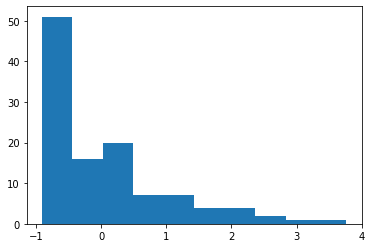

In [102]:
plt.hist(df_original.T['LOC100132287'])

# Select the intersection of genes

In [219]:
def inter_gene_selection(df_1, df_2, df_original):
  # get the indexs of two datasets
  index_df_1 = list(df_1.index)
  index_df_2 = list(df_2.index)

  # select the common index
  index_inter = [i for i in index_df_1 if i in index_df_2]
  # index_inter = list(set(df_1).intersection(set(df_2)))

  # select intersections genes from original dataset
  df_original_T = df_original.T
  df_inter_gene = df_original_T[index_inter]
  n_inter_gene = len(df_inter_gene.T)

  return df_inter_gene, n_inter_gene

In [220]:
df_inter_g1, n_gene_g1 = inter_gene_selection(df_sc_g1, df_zz_g1, df_original)
df_inter_g2, n_gene_g2 = inter_gene_selection(df_sc_g2, df_zz_g2, df_original)
df_inter_g3, n_gene_g3 = inter_gene_selection(df_sc_g3, df_zz_g3, df_original)

In [221]:
print(n_gene_g1)
print(n_gene_g2)
print(n_gene_g3)

52
85
58


# preprocess dataset

In [222]:
df_group = pd.read_csv('/content/drive/MyDrive/Data mining project/group.csv')
df_group

,0,patient,location,color
0,DFS-HV-CTC-5,DFS,HV,red
1,ZZY-HV-CTC24,ZZY,HV,red
2,ZZY-HV-CTC5,ZZY,HV,red
3,ZZY-HV-CTC6,ZZY,HV,red
4,ZZY-HV-CTC7,ZZY,HV,red
...,...,...,...,...
108,XDY-PV-CTC2,XDY,PV,blue
109,XDY-PV-CTC3,XDY,PV,blue
110,GRL-PoV-CTC1,GRL,PoV,green
111,LYT-HV-CTC-7,LYT,HV,red


In [223]:
# Convert the location to a column with integer labels
# HV - > 0
# PA - > 1
# PV - > 2
# PoV - > 3
label_encoder = LabelEncoder()
df_group['location'] = label_encoder.fit_transform(df_group['location'])
df_group

,0,patient,location,color
0,DFS-HV-CTC-5,DFS,0,red
1,ZZY-HV-CTC24,ZZY,0,red
2,ZZY-HV-CTC5,ZZY,0,red
3,ZZY-HV-CTC6,ZZY,0,red
4,ZZY-HV-CTC7,ZZY,0,red
...,...,...,...,...
108,XDY-PV-CTC2,XDY,2,blue
109,XDY-PV-CTC3,XDY,2,blue
110,GRL-PoV-CTC1,GRL,3,green
111,LYT-HV-CTC-7,LYT,0,red


In [224]:
df_index = df_group[['location']]

In [225]:
df_index

,location
0,0
1,0
2,0
3,0
4,0
...,...
108,2
109,2
110,3
111,0


In [16]:
df_original.shape[0]

13013

In [17]:
df_original.shape[1]

113

In [18]:
# combine the label to the original dataset
df_original = df_original.T
df_original.insert(df_original.shape[1], 'label', df_index[['location']])
df_original_comb = df_original
df_original_comb

gene,WASH7P,LOC729737,LOC100132287,LOC100133331,LOC100288069,LOC100287934,LINC00115,LINC01128,FAM41C,LOC284600,...,UTY,TMSB4Y,NCRNA00185,CD24,TTTY14,TXLNGY,KDM5D,EIF1AY,RPS4Y2,label
DFS-HV-CTC-5,3.893219,0.000000,1.011480,0.986167,0.156148,0.000000,0.000000,0.470406,0.798554,1.103523,...,0.000000,3.197096,0.000000,0.556173,0.000000,2.927385,0.000000,5.075310,0.000000,0
ZZY-HV-CTC24,1.699456,0.671562,0.832409,0.515847,0.798249,0.531436,0.851172,0.943088,0.399366,0.000000,...,0.869137,0.983028,1.428933,4.703304,0.663610,2.295398,1.011821,5.123680,1.626610,0
ZZY-HV-CTC5,2.074900,0.103372,0.209570,0.021445,0.000000,0.735264,0.000000,0.000000,0.240168,0.000000,...,1.824384,2.196274,0.983124,4.676855,0.988599,1.945397,0.016460,4.170843,1.739367,0
ZZY-HV-CTC6,1.648008,0.085883,0.045492,0.023521,0.200922,0.000000,1.408232,2.194429,0.057902,0.000000,...,1.498273,2.009398,0.799503,5.179357,2.104767,0.829968,0.618653,5.377424,1.515171,0
ZZY-HV-CTC7,1.728863,0.308560,0.131640,0.000000,0.943764,0.789160,0.000000,2.864298,0.000000,0.000000,...,0.764297,2.845450,0.000000,5.206197,0.000000,0.000000,0.000000,5.121661,1.661988,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XDY-PV-CTC2,3.274392,0.484916,0.822088,0.144326,0.000000,1.252868,0.000000,1.667635,0.000000,0.000000,...,1.335607,1.929059,0.510215,0.000000,0.000000,1.044062,1.388165,3.339515,1.104326,2
XDY-PV-CTC3,3.010920,0.853891,1.360328,0.272038,0.000000,1.274859,0.000000,0.000000,0.456653,0.000000,...,1.383416,3.877311,0.000000,0.000000,2.353623,2.687714,2.987547,3.870520,1.481882,2
GRL-PoV-CTC1,1.029725,0.000000,0.000000,0.000000,0.164400,0.000000,0.170597,2.166387,0.000000,0.000000,...,0.000000,4.079664,0.000000,1.466447,0.000000,0.000000,0.290076,4.830326,0.000000,3
LYT-HV-CTC-7,2.605585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.372385,...,0.199375,3.390452,0.000000,0.000000,0.000000,0.000000,0.000000,3.734691,0.000000,0


In [203]:
df_original = df_original.drop('label', axis = 1)

In [204]:
df_original_comb = df_original_comb.drop('label', axis = 1)

In [226]:
# define a dataset to combine the label with the data
def add_label(df, df_index):
  # df = df.T
  df.insert(df.shape[1], 'label', df_index[['location']])
  df_comb = df
  return df_comb

In [123]:
df_sc_g1 = add_label(df_sc_g1.T, df_index)
df_sc_g2 = add_label(df_sc_g2.T, df_index)
df_sc_g3 = add_label(df_sc_g3.T, df_index)
# df_gc_g1 = add_label(df_gc_g1, df_index)
# df_gc_g2 = add_label(df_gc_g2, df_index)
# df_gc_g3 = add_label(df_gc_g3, df_index)

In [227]:
df_inter_g1 = add_label(df_inter_g1, df_index)
df_inter_g2 = add_label(df_inter_g2, df_index)
df_inter_g3 = add_label(df_inter_g3, df_index)

In [230]:
df_inter_g3

gene,HRG,ANGPTL3,MTCH2,HRSP12,MT1G,MT1H,PTPN6,GATM,HPD,FABP1,...,APOC2,ALB,CBR1,FCER1A,FBP1,APOA2,CD52,NOP16,APOC3,label
DFS-HV-CTC-5,0.734157,-0.878337,-0.708998,0.670376,0.324790,-0.725719,1.066338,-0.678886,-1.004491,0.030549,...,0.220739,-0.172296,-0.834833,-0.689220,-0.426950,0.118756,1.923067,0.797413,0.458288,0
ZZY-HV-CTC24,0.864960,2.530546,1.821883,1.182262,-0.959707,-0.725719,0.610260,1.337734,-0.716398,0.911018,...,1.265215,0.398431,1.946351,0.126189,0.708676,1.450124,0.159992,1.729432,-0.406571,0
ZZY-HV-CTC5,1.045064,2.048437,1.820706,1.078809,-0.643533,-0.725719,0.920873,1.666408,-0.134265,1.549579,...,1.217689,0.367858,1.671112,-0.689220,0.866733,1.547893,-0.742655,1.847975,-0.133554,0
ZZY-HV-CTC6,0.556881,2.205256,1.779803,1.188397,-1.210669,-0.725719,0.167396,1.617678,-0.202512,0.694604,...,0.496937,0.398135,1.294581,-0.689220,-0.847355,1.780528,-0.181911,1.614585,-0.211833,0
ZZY-HV-CTC7,1.528974,1.417072,1.173515,1.135473,-1.210669,-0.725719,0.481791,2.033521,-0.194023,1.787159,...,1.389035,0.820323,1.562081,-0.500933,0.609380,1.465189,-0.742655,1.268951,-0.282755,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XDY-PV-CTC2,-0.886398,-0.878337,-1.047853,-1.298350,-1.210669,-0.725719,1.755961,-1.063192,-1.004491,-1.338718,...,-1.548220,-1.786305,-0.805165,0.898737,-0.823675,-1.968824,1.306296,-0.788513,-1.502245,2
XDY-PV-CTC3,-0.854805,-0.878337,0.208163,0.424941,-1.146289,-0.725719,1.671531,-1.040061,-0.895889,-1.245985,...,-1.548220,-1.725897,-1.051623,2.269323,-0.826578,-1.968824,-0.742655,-0.788513,-1.608552,2
GRL-PoV-CTC1,1.699019,0.365193,1.695887,0.648296,1.011230,-0.725719,-1.603580,1.484617,1.677099,1.038114,...,0.994578,1.225780,-1.277850,-0.689220,1.456815,0.828019,-0.742655,0.533500,1.139760,3
LYT-HV-CTC-7,1.625438,0.508579,-1.207967,1.265005,1.619072,1.762231,-0.331218,0.520664,0.843304,1.115855,...,1.004487,0.830459,-1.277850,-0.689220,0.744600,0.657970,-0.742655,-0.788513,0.887901,0


# Select important genes using decision tree

In [173]:
def feature_selection_dt(df):
  # define dataset and label
  X = df.drop(['label'], axis = 1)
  y = df['label']

  # split the dataset to trainset and testset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)
  
  # train the model
  dtree = DecisionTreeClassifier(criterion="entropy", random_state=123,
                                max_depth=4,
                                min_samples_leaf=5)
  dtree.fit(X_train, y_train)
  
  # prediction
  pred_train = dtree.predict(X_train)
  pred_test = dtree.predict(X_test)
  
  # accuracy
  train_acc = accuracy_score(y_train, pred_train)
  test_acc = accuracy_score(y_test, pred_test)
  print ("trainset accuracy: {0:.2f}, testset accuracy: {1:.2f}".format(train_acc, test_acc))
  
  # other three evaluation matrix
  precision, recall, F1, _ = precision_recall_fscore_support(y_test, pred_test, average = 'micro')
  print("precision: {0:.2f}. recall: {1:.2f}, F1-score: {2:.2f}".format(precision, recall, F1))
  
  # the importances of features
  features = list(X_test.columns)
  importances = dtree.feature_importances_
  indices = np.argsort(importances)[::-1]
  num_features = len(importances)
  num_nonzero = np.count_nonzero(importances)

  return features, importances, indices, num_nonzero

In [174]:
# plot the importances of features using bar chart
def importance_barchart_dt(features, importances, indices, num_nonzero):
  plt.figure()
  plt.figure(figsize = (8, 4.5))
  plt.title("Important genes selected using decision tree")
  plt.bar(range(num_nonzero), importances[indices][:num_nonzero], color="g", align="center")
  plt.xticks(range(num_nonzero), [features[i] for i in indices[:num_nonzero]], rotation='45')
  plt.xlabel('gene')
  plt.ylabel('importance')
  plt.xlim([-1, num_nonzero])
  plt.show()

In [175]:
def show_importance(features, importances, indices):
# show importances of all features
 for i in indices:
     print ("{0} - {1:.3f}".format(features[i], importances[i]))

In [207]:
df_inter_g3

gene,HRG,ANGPTL3,MTCH2,HRSP12,MT1G,MT1H,PTPN6,GATM,HPD,FABP1,...,APOC2,ALB,CBR1,FCER1A,FBP1,APOA2,CD52,NOP16,APOC3,label
DFS-HV-CTC-5,0.734157,-0.878337,-0.708998,0.670376,0.324790,-0.725719,1.066338,-0.678886,-1.004491,0.030549,...,0.220739,-0.172296,-0.834833,-0.689220,-0.426950,0.118756,1.923067,0.797413,0.458288,0
ZZY-HV-CTC24,0.864960,2.530546,1.821883,1.182262,-0.959707,-0.725719,0.610260,1.337734,-0.716398,0.911018,...,1.265215,0.398431,1.946351,0.126189,0.708676,1.450124,0.159992,1.729432,-0.406571,0
ZZY-HV-CTC5,1.045064,2.048437,1.820706,1.078809,-0.643533,-0.725719,0.920873,1.666408,-0.134265,1.549579,...,1.217689,0.367858,1.671112,-0.689220,0.866733,1.547893,-0.742655,1.847975,-0.133554,0
ZZY-HV-CTC6,0.556881,2.205256,1.779803,1.188397,-1.210669,-0.725719,0.167396,1.617678,-0.202512,0.694604,...,0.496937,0.398135,1.294581,-0.689220,-0.847355,1.780528,-0.181911,1.614585,-0.211833,0
ZZY-HV-CTC7,1.528974,1.417072,1.173515,1.135473,-1.210669,-0.725719,0.481791,2.033521,-0.194023,1.787159,...,1.389035,0.820323,1.562081,-0.500933,0.609380,1.465189,-0.742655,1.268951,-0.282755,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XDY-PV-CTC2,-0.886398,-0.878337,-1.047853,-1.298350,-1.210669,-0.725719,1.755961,-1.063192,-1.004491,-1.338718,...,-1.548220,-1.786305,-0.805165,0.898737,-0.823675,-1.968824,1.306296,-0.788513,-1.502245,2
XDY-PV-CTC3,-0.854805,-0.878337,0.208163,0.424941,-1.146289,-0.725719,1.671531,-1.040061,-0.895889,-1.245985,...,-1.548220,-1.725897,-1.051623,2.269323,-0.826578,-1.968824,-0.742655,-0.788513,-1.608552,2
GRL-PoV-CTC1,1.699019,0.365193,1.695887,0.648296,1.011230,-0.725719,-1.603580,1.484617,1.677099,1.038114,...,0.994578,1.225780,-1.277850,-0.689220,1.456815,0.828019,-0.742655,0.533500,1.139760,3
LYT-HV-CTC-7,1.625438,0.508579,-1.207967,1.265005,1.619072,1.762231,-0.331218,0.520664,0.843304,1.115855,...,1.004487,0.830459,-1.277850,-0.689220,0.744600,0.657970,-0.742655,-0.788513,0.887901,0


trainset accuracy: 0.83, testset accuracy: 0.48
precision: 0.48. recall: 0.48, F1-score: 0.48


<Figure size 864x576 with 0 Axes>

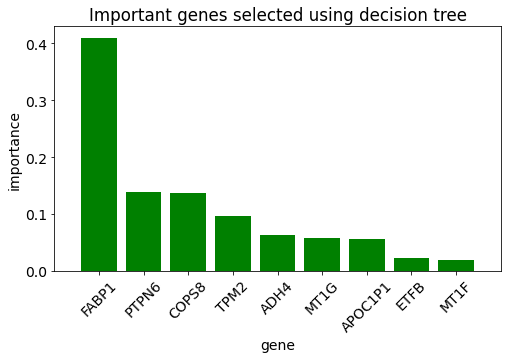

In [236]:
features, importances, indices, num_nonzero = feature_selection_dt(df_inter_g3)
importance_barchart_dt(features, importances, indices, num_nonzero)

In [ ]:
show_importance(features, importances, indices)

In [237]:
# storage in dataframe
df_important_gene = []
for i in indices:
  df_important_gene.append(features[i])
df_important_gene = df_important_gene[:num_nonzero]
df_important_gene = pd.DataFrame(df_important_gene)
df_important_gene

,0
0,FABP1
1,PTPN6
2,COPS8
3,TPM2
4,ADH4
5,MT1G
6,APOC1P1
7,ETFB
8,MT1F


# Select important genes using random forest

In [238]:
def feature_selection_rf(df):
  # set attributes and class label
  X = df.drop(["label"], axis=1)
  y = df["label"]
  
  # split the dataset to trainset and testset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, shuffle=True)
  
  # train the model
  forest = RandomForestClassifier(
      n_estimators=10, criterion="entropy",
      max_depth=4, min_samples_leaf=5)
  forest.fit(X_train, y_train)
  
  # prediction
  pred_train = forest.predict(X_train)
  pred_test = forest.predict(X_test)
  
  # accuracy
  train_acc = accuracy_score(y_train, pred_train)
  test_acc = accuracy_score(y_test, pred_test)
  print ("trainset accuracy: {0:.2f}, testset accuracy: {1:.2f}".format(train_acc, test_acc))
  
  # other evaluation metrics
  precision, recall, F1, _ = precision_recall_fscore_support(np.array(y_test), np.array(pred_test), average='micro')
  print("precision: {0:.2f}. recall: {1:.2f}, F1-score: {2:.2f}".format(precision, recall, F1))
  
  # the importances of features
  features = list(X_test.columns)
  importances = forest.feature_importances_
  indices = np.argsort(importances)[::-1]
  num_features = len(importances)
  num_nonzero = np.count_nonzero(importances)

  return features, importances, indices, num_nonzero

In [239]:
def importance_barchart_rf(features, importances, indices, num_nonzero):
  # show the importances of features using the bar chart
  plt.figure()
  plt.figure(figsize = (12, 8))
  plt.title("Important genes selected using randomforest")
  plt.bar(range(num_nonzero), importances[indices][:num_nonzero], color="b", align="center")
  plt.xticks(range(num_nonzero), [features[i] for i in indices[:num_nonzero]], rotation='90')
  plt.xlabel('gene')
  plt.ylabel('importance')
  plt.xlim([-1, num_nonzero])
  plt.show()

trainset accuracy: 0.82, testset accuracy: 0.55
precision: 0.55. recall: 0.55, F1-score: 0.55


<Figure size 864x576 with 0 Axes>

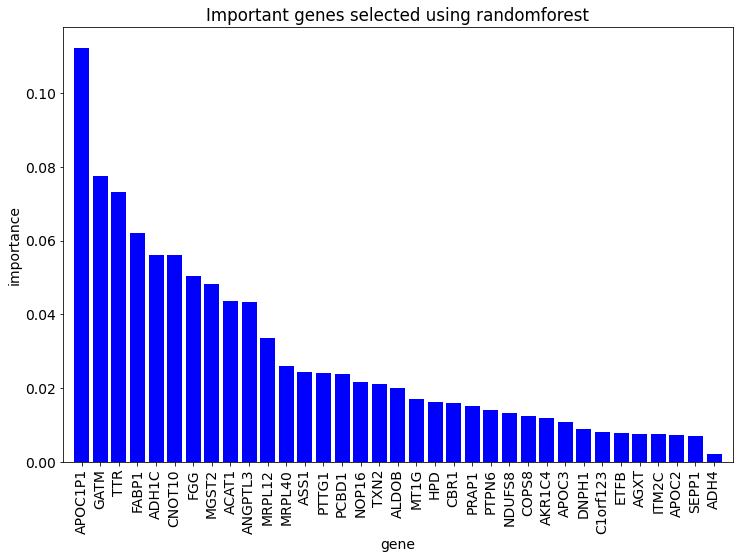

In [244]:
features, importances, indices, num_nonzero = feature_selection_rf(df_inter_g3)
importance_barchart_rf(features, importances, indices, num_nonzero)

In [ ]:
show_importance(features, importances, indices)

In [245]:
# storage in dataframe
df_important_gene = []
for i in indices:
  df_important_gene.append(features[i])
df_important_gene = df_important_gene[:num_nonzero]
df_important_gene = pd.DataFrame(df_important_gene)
df_important_gene

,0
0,APOC1P1
1,GATM
2,TTR
3,FABP1
4,ADH1C
5,CNOT10
6,FGG
7,MGST2
8,ACAT1
9,ANGPTL3


# Select important genes using SVM-REF

In [131]:
from sklearn.svm import SVR, SVC
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import LinearSVC
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

In [132]:
def SVR_RFE(df, n_features):
  X = df.drop('label', axis = 1).to_numpy()
  y = df['label'].to_numpy()
  estimator = SVR(kernel="linear")
  selector = RFE(estimator, n_features_to_select = n_features, step = 1)
  selector = selector.fit(X, y)

  # show the selected feature(true means selected)
  print(selector.support_)
  # Score ranking for each feature, lower feature score (1 is best) indicates better feature
  print(selector.ranking_)
  # number of feature selected
  print(selector.n_features_)

  return selector.support_, selector.ranking_, selector.n_features_

In [133]:
def LinearSVC_RFE(df, n_features):
  # iris = load_iris()
  X = df.drop('label', axis = 1).to_numpy()
  y = df['label'].to_numpy()
  # X, y = iris.data, iris.target
  ## feature extractor
  estimator = SVC(kernel = 'linear')
  selector = RFE(estimator=estimator, n_features_to_select = n_features)
  selector = selector.fit(X, y)

  # show the selected feature(true means selected)
  print(selector.support_)
  # Score ranking for each feature, lower feature score (1 is best) indicates better feature
  print(selector.ranking_)
  # number of feature selected
  print(selector.n_features_)

  return selector.support_, selector.ranking_, selector.n_features_

In [145]:
def SVC_RFECV(df, kfold):

  X = df.drop('label', axis = 1).to_numpy()
  y = df['label'].to_numpy()

  # Create the RFE object and compute a cross-validated score.
  svc = SVC(kernel = "linear")
  # The "accuracy" scoring is proportional to the number of correct
  # classifications
  rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(kfold),
                scoring='accuracy')
  rfecv.fit(X, y)

  print("Optimal number of features : %d" % rfecv.n_features_)
  print("Ranking of features : %s" % rfecv.ranking_)
  print('Selected feature : %s' % rfecv.support_)

  # Plot number of features VS. cross-validation scores
  plt.figure()
  plt.figure(figsize = (8, 4.5))
  plt.xlabel("Number of features selected")
  plt.ylabel("Cross validation score (nb of correct classifications)")
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
  plt.show()

  return rfecv.support_, rfecv.ranking_, rfecv.n_features_

In [324]:
support, ranking, n_features = SVR_RFE(df_inter_g3, 1)

[False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
[11 36 47  5 51 28 24 14 27 40 33 13 37 19 48 35 17 21 12 22 38 46 49  1
 26 42 52 32 41  4 34 53 57 54 29  8 30 23 18 15 31 58 50 20 39  3 56 55
  7  9  2 43 44  6 10 45 16 25]
1


In [330]:
support, ranking, n_features = LinearSVC_RFE(df_inter_g3, 1)

[False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
[15 37  9 12  2 13 21 40 31  3 56 28 45 26 29 41 22 38 33 25 18 58 43  1
 49 36 48 42 16  6 11 32  7 53 27 39 46 52 17 51 14 30 55 54 57 19 24 34
  8 44 20 50 10  4 35 23  5 47]
1


Optimal number of features : 23
Ranking of features : [ 1 15  1  1  1  1  1 18  9  1 34  6 23  4  7 19  1 16 11  3  1 36 21  1
 27 14 26 20  1  1  1 10  1 31  5 17 24 30  1 29  1  8 33 32 35  1  2 12
  1 22  1 28  1  1 13  1  1 25]
Selected feature : [ True False  True  True  True  True  True False False  True False False
 False False False False  True False False False  True False False  True
 False False False False  True  True  True False  True False False False
 False False  True False  True False False False False  True False False
  True False  True False  True  True False  True  True False]


The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.


<Figure size 864x576 with 0 Axes>

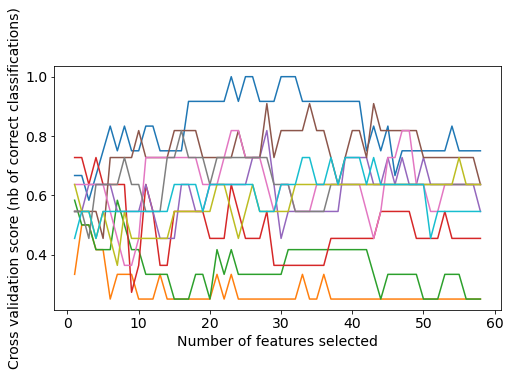

In [273]:
support, ranking, n_features = SVC_RFECV(df_inter_g3, 10)

define a function to select important gene

In [320]:
# this function is for scv-rfe and scr-rfe
def gene_selection_rfe(df, ranking, num_genes):
  # get all genes in dataframe
  index = np.array(df.drop('label', axis = 1).T.index)

  # sort the index based on the ranking
  sorted_index = np.argsort(ranking)
  sorted_features = index[sorted_index]
  sorted_features = sorted_features[:num_genes]

  return sorted_features

In [247]:
# this function is for svc-rfecv
def gene_selection(df, ranking):
  # get all genes in dataframe
  index = list(df.drop('label', axis = 1).T.index)
  important_genes = []

  for i in range(len(ranking)):
    if ranking[i] == 1:
      important_genes.append(index[i])
  
  return important_genes

In [331]:
# select genes based on rfe ranks
genes = gene_selection_rfe(df_inter_g3, ranking, 20)
df_important_gene = pd.DataFrame(genes)
df_important_gene

,0
0,ADH1C
1,MT1G
2,FABP1
3,FBP1
4,NOP16
5,APOC1P1
6,TPM2
7,ACAT1
8,MTCH2
9,FCER1A


In [274]:
# select genes based on rfecv
genes = gene_selection(df_inter_g3, ranking)
df_important_gene = pd.DataFrame(genes)
df_important_gene

,0
0,HRG
1,MTCH2
2,HRSP12
3,MT1G
4,MT1H
5,PTPN6
6,FABP1
7,DNPH1
8,AMBP
9,ADH1C


# Select important genes using XGBoost

In [151]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 6.8 MB/s 


In [152]:
# import additional libraries for xgboost
import shap
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
from xgboost import XGBClassifier

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [153]:
df_sc_g1.T.index.to_numpy()

array(['MIR584', 'RABL2A', 'RAMP3', 'FLJ43681', 'RPL23AP7', 'RPL23AP82',
       'SV2C', 'BCLAF1', 'TSPAN2', 'FOS', 'MYL1', 'MASP2', 'ADORA2A',
       'UCP2', 'LSM5', 'KATNB1', 'MYL4', 'DUSP1', 'TCERG1', 'C20orf96',
       'NDRG3', 'DDX11L8', 'ARG2', 'HDAC5', 'MMGT1', 'TRBV7-4',
       'MAST4-AS1', 'FAM49B', 'XRN2', 'TRIM52-AS1', 'ACOT8', 'CLK1',
       'ARMC3', 'TRIM35', 'SFXN3', 'SCAMP2', 'LTV1', 'SLC6A6', 'SUSD3',
       'MRPS17', 'TMSB4Y', 'MFSD2B', 'ZFP36', 'SPDYC', 'ACSBG1', 'DPCD',
       'TCTA', 'PPM1L', 'PIK3CG', 'C10orf12', 'METTL5', 'GSTM1',
       'LINC01011', 'SLFN14', 'ATF2', 'LRMP', 'RSPH9', 'GLYATL2',
       'LINC00844', 'ANGPT1', 'SURF1', 'GRB14', 'ZBED5-AS1', 'SLC6A4',
       'DEFB1', 'IGHJ6', 'PLXDC2', 'JAM3', 'CIDECP', 'NOP16', 'TLR5',
       'FAM212B-AS1', 'LPAR5', 'CABP5', 'SNORD47', 'WDR61', 'MYEOV',
       'RTCA-AS1', 'HIST1H2BL', 'C11orf21', 'HRASLS', 'TESPA1', 'PVALB',
       'MMRN1', 'label'], dtype=object)

In [154]:
from scipy.stats import spearmanr

In [155]:
def correlation_heatmap(train):
    correlations, _ = spearmanr(train)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.title('Spearman correlation matrix')
    plt.show();

In [169]:
def xgb(df, num_trees, xgb_type, importance_type, num_features):
  # prepare dataset
  X = df.drop('label', axis = 1)
  y = df['label']
  index = X.T.index.to_numpy()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

  # choose xgboost type
  if xgb_type == 'reg':
    xgb = XGBRegressor(n_estimators = num_trees)
  elif xgb_type == 'clf':
    xgb = XGBClassifier(n_estimators = num_trees)

  # fit the model
  xgb.fit(X_train, y_train)
  feature_importance = xgb.feature_importances_

  # visualization based on different importances of features
  # 0 - > Feature importance
  # 1 - > Permutation based importance
  # 2 - > SHAP importance
  if importance_type == 0:
    sorted_idx = xgb.feature_importances_.argsort()
    plt.barh(index[sorted_idx][-num_features:], xgb.feature_importances_[sorted_idx][-num_features:])
    plt.xlabel("Importance")
    plt.ylabel('important genes')
    plt.title('Feature importances')
    plt.show()
  elif importance_type == 1:
    perm_importance = permutation_importance(xgb, X_test, y_test)
    sorted_idx = perm_importance.importances_mean.argsort()
    plt.figure()
    plt.barh(index[sorted_idx][-num_features:], perm_importance.importances_mean[sorted_idx][-num_features:])
    plt.xlabel("Importance")
    plt.ylabel('important genes')
    plt.title('Permutation importances')
    plt.show()
    # plot heatmap
    plt.figure()
    correlation_heatmap(X_train[index[sorted_idx][-num_features:]])
  elif importance_type == 2:
    sorted_idx = xgb.feature_importances_.argsort()
    explainer = shap.TreeExplainer(xgb)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    # shap.summary_plot(shap_values, X_test)

  
  # return selected features
  selected_features = index[sorted_idx][-num_features:]

  return selected_features

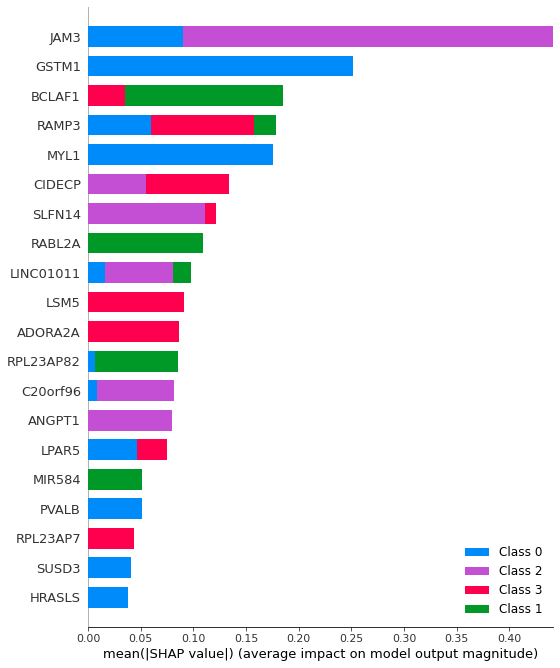

In [291]:
selected_genes = xgb(df_inter_g1, 10, 'clf', 2, 20)

In [290]:
df_important_genes = pd.DataFrame(selected_genes)
df_important_genes

,0
0,APOC1P1
1,ACAA2
2,SHMT1
3,HRSP12
4,PTPN6
5,MT1G
6,ITM2C
7,FBP1
8,MT1F
9,PTTG1
